## CLASSFICATION MODELS EVALUATION METHODS (METRICS)

### Four of the main evaluation metrics/methods you'll come across for classification models are:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Assume Data is complete (no missing values) and ready 

In [2]:
heart_df = pd.read_csv("data/heart-disease.csv")
heart_df.head() # classification dataset - supervised learning

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1. Accuracy - cross_val_score()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_df.drop("target", axis=1)
y = heart_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
cross_val_score = cross_val_score(clf,X,y,cv=5)
cross_val_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [4]:
print(f"Heart Disease Classifier Cross-Validated Accuracy = {np.mean(cross_val_score)*100:.2f}%")
# .2f = 2 decimal places

Heart Disease Classifier Cross-Validated Accuracy = 81.16%


#### Conclusion: 
Given a random sample(features) our model hasn't seen before, how likely it is to predict the right label(target) based on the original training data --> 81.16%

### 2. Area Under ROC (Receiver Operating Characteristic) Curve

It's usually referred to as Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic (ROC) curve

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity: (predict target vs true target)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

Scikit-Learn lets you calculate the information required for a ROC curve using the [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function.

In [5]:
from sklearn.metrics import roc_curve

## Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
# y_probs[:10]

## Keep the probabilites of the positive class only - ROC curve plot
y_probs_positive = y_probs[:,1] # column 1 only
# probability that label is 0, column 0 --> -ve class, 
# probability that label is 1 , column 1 --> +ve class
# y_probs_positive[:10]

## Calculate fpr, tpr and thresholds
# press shift + tab to open doc string of jupyter notebook (roc curve using sklearn)
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

## Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

Looking at these on their own doesn't make much sense. It's much easier to see their value visually.

Since Scikit-Learn doesn't have a built-in function to plot a ROC curve, quite often, you'll find a function (or write your own) like the one below.

In [6]:
# CREATE A FUNCTION for plotting ROC curve

def plot_roc_curve(fpr,tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate (tpr) of a model
    """
    # Plot roc curve (X - fpr, Y-tpr)
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    # Plot line with no predictive power(baseline) - for comparison of our model
    # A guessing line to find x and y coordinates
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

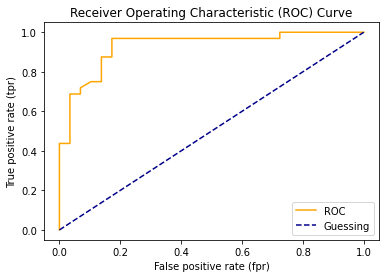

In [7]:
plot_roc_curve(fpr,tpr)

A metric you can use to quantify the ROC curve in a single number is AUC (Area Under Curve). Scikit-Learn implements a function to caculate this called [roc_auc_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score).

The maximum ROC AUC score you can achieve is 1.0 and generally, the closer to 1.0, the better the model.

In [8]:
# See the auc(area under curve) score
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.9304956896551724

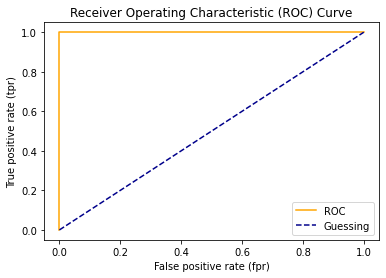

In [9]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

A perfect ROC curve would mean that the model predicts only true positives and no false positives. And would result in a ROC AUC score of 1.0

#### In reality, a perfect ROC curve is unlikely. So if u get it, it means that there is something wrong with ur model

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

For more information on these metrics, bookmark the following resources and refer to them when you need:

* [ROC and AUC, Clearly Explained! by StatQuest](https://www.youtube.com/watch?v=4jRBRDbJemM)

* [ROC documentation in Scikit-Learn (contains code examples)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

* [How the ROC curve and AUC are calculated by Google's Machine Learning team](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

### 3. Confusion matrix

The next way to evaluate a classification model is by using a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [10]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [11]:
pd.crosstab(y_test, # true label
            y_preds, # predicted label
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

# when predict = 0 and actual = 0, we have 24 samples
# when predict = 1 and actual = 1, we have 28 samples

# false +ve --> when predict = 1 and actual = 0
# false -ve --> when predict = 0 and actual = 1
# so, model is getting confused in false +ve and false -ve

Predicted Label,0,1
Actual Label,,
0,24,5
1,4,28


An even more BETTER visual way is with Seaborn's [heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html) plot.

Seaborn is a visualization library which is built on top of Matplotlib. It contains a bunch of helpful plotting functions.

In [15]:
# Visualize (plot) a confusion matrix with Seaborn
import seaborn as sns 

# Create a confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

In [22]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    
    # Set the font scale
    sns.set(font_scale=1.5)
    
    ax = sns.heatmap(
        conf_mat,
        annot = True, # Annotate the boxes 
        cbar=False
    )
    
    plt.xlabel("Predicted label");
    plt.ylabel("True label");

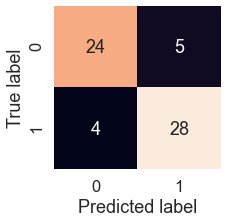

In [23]:
plot_conf_mat(conf_mat)

Scikit-Learn has an implementation of plotting a confusion matrix in [plot_confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix), however, it is a little bit complicated 

So we prefer to use seaborn's heatmap instead

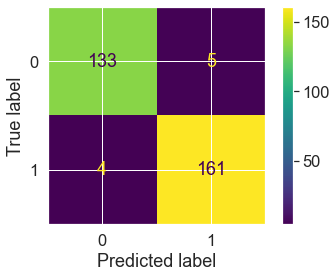

In [25]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y);

### 4. Classification Report

The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's [classification_report()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function.

In [27]:
# No. of testing samples for prediction
len(y_test)

61

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

**However**,
For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score

In [31]:
# Where precision and recall become valuable 

disease_true = np.zeros(10000) # 10000 people
disease_true[0] = 1 # only 1 case 

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(
    disease_true,
    disease_preds,
    output_dict = True
))

C:\Users\HP\Desktop\jupy_sampleProject1\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\Desktop\jupy_sampleProject1\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\Desktop\jupy_sampleProject1\env\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


You can see here, we've got an accuracy of 0.9999 (99.99%), great precision and recall on class 0.0 but nothing for class 1.0.

Ask yourself, although the model achieves 99.99% accuracy, is it useful?

To summarize:

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision.
* If false negative predictions are worse than false positives, aim for higher recall.

In [32]:
# Look for more evaluation metrics on Sklearn or Google

In [ ]:
# ----------------------------------------------------